# Name(s): Danica Padlan (dmp3357), Ashley Yude (acy366)

# Assignment 5: Clustering

In this assignment we'll be looking at three popular types of clustering algorithms -- K-Means clustering, Density Based clustering, and Hierarchical clustering. We'll also look at some measures of cluster quality like cohesion, separation and silhoutte coefficient.

## Part 1: Implement K Means Clustering

In k-means clustering you are given a dataset and a hyperparameter, k, specifying the number of desired clusters. The objective function of k-means is to minimize the sum of squared error (SSE) of the output clusters. Unfortunately, the solution to this problem is NP Hard. In this assignment we'll be implementing the iterative algorithm that produces the locally optimal solution to this problem but guarantees convergence.

In [405]:
# Some headers
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame
from sklearn.manifold import MDS
from sklearn.model_selection import StratifiedKFold
from scipy.spatial.distance import pdist

In [406]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

450


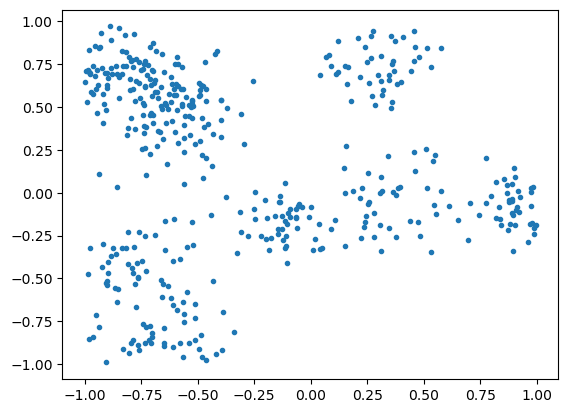

In [407]:
# get data from text file
data = np.genfromtxt("data_kmeans.csv", delimiter=",")

#print size of data and make scatter plot
print(len(data))
plt.scatter(data[:,0],data[:,1], marker='.')

Q1. Implement the function `generate_clusters` that returns clusters, given the cluster centroids (`mu`) and the dataset (`data`). Each datapoint needs to be associated to the closest cluster centroid.

In [408]:
#calculates Euclidean distance
def get_distance(Q, P):
    return sqrt((square(Q[0] - P[0])) + square((Q[1] - P[1])))

In [409]:
import sys
import math
def generate_clusters(data, mu):  
    
    # make a list of list of clusters (3d matrix)
    big_clusters = []
    
    # list length is size of mu list
    for i in range (len(mu)):
        curr_cluster = [[],[]]
        curr_cluster[0].append(mu[i][0])
        curr_cluster[1].append(mu[i][1])
        big_clusters.append(curr_cluster)
    
    #loop through all datapoints and calculate distances from all cluster
    #distance with small distance = add datapoint to that cluster's list
    for i in range (len(data)):
        
        best_centroid = 0
        shortest_dist = sys.maxsize
        
        for j in range (len(mu)):
            cur_dist = get_distance(mu[j], data[i])
            
            if(cur_dist < shortest_dist):
                shortest_dist = cur_dist
                best_centroid = j
                
        big_clusters[best_centroid][0].append(data[i][0])
        big_clusters[best_centroid][1].append(data[i][1])
        
    return big_clusters

In [410]:
# #TODO: Tested so gooood
# centroids_dp = [[-0.75,.5], [-0.75,-0.5], [0.5,0]]

# results = generate_clusters(data, centroids_dp)


# #TODO: fix hard coded-ness
# cent_1 = results[0]
# cent_2 = results[1]
# cent_3 = results[2]

# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter(cent_1[0], cent_1[1], c='b')
# ax1.scatter(cent_2[0], cent_2[1], c='r')
# ax1.scatter(cent_3[0], cent_3[1], c='g')

Q2. Implement the function `recompute_centroids` that returns the centroids given a set of input clusters.

In [411]:
def recompute_centroids(clusters):
    
    new_centroid = []
    
    #loop through each list and calculate the new centroid coords
    for i in range(len(clusters)):
        cur_centroid = [np.mean(clusters[i][0]), np.mean(clusters[i][1])]
        new_centroid.append(cur_centroid)
    
    return new_centroid

In [412]:
# #Testing
# cent_results = recompute_centroids(results)

# ncent_1 = cent_results[0]
# ncent_2 = cent_results[1]
# ncent_3 = cent_results[2]

# fig = plt.figure()
# ax1 = fig.add_subplot(111)


# ax1.scatter(cent_1[0], cent_1[1], c='b')
# ax1.scatter(cent_2[0], cent_2[1], c='r')
# ax1.scatter(cent_3[0], cent_3[1], c='g')
# ax1.scatter(ncent_1[0], ncent_1[1], c='y', edgecolors='black')
# ax1.scatter(ncent_2[0], ncent_2[1], c='y', edgecolors='black')
# ax1.scatter(ncent_3[0], ncent_3[1], c='y', edgecolors='black')


Q3. Implement the function `check_convergence` that checks if the termination condition of k means algorithm has reached, i.e. the previous centroids are the same as the new centroids. 

In [413]:
def check_convergence(mu, previous_mu):
    for i in range(len(mu)):
        
        #checks if the centroids changed after a re-sorting of clusters
        if mu[i][0] != previous_mu[i][0] or mu[i][1] != previous_mu[i][1]:
            return False
        
    return True

In [414]:
# #Tested!
# print("Compared to centroid_dp, should be False:" ,check_convergence(cent_results, centroids_dp))
# print("Compared to cent_results, should be True:" ,check_convergence(cent_results, cent_results))

Q4. Implement the function `k_means_clustering` that returns k clusters along with their centroids given the input dataset and the desired number of clusters (`k`).

IMPORTANT: The actual k-means clustering algorithm starts by selecting k random centroids. For the purposes of this assignment, always choose the first k datapoints in the dataset to be your initial centroids.

In [415]:
def k_means_clustering(data, k):
    
    #intialize list of initial centroids
    #this format[[-0.75,.5], [-0.75,-0.5], [0.5,0]]
    mu = []
    
    #choose first k clusters as first centroids
    for i in range(k):
        mu.append([data[i][0], data[i][1]])
    
    #split into initial clusters
    clusters = generate_clusters(data, mu)
    is_cents_changed = True
    
    while(is_cents_changed):
    
        #split into clusters
        clusters = generate_clusters(data, mu)

        #generate new clusters based on mean of the points assigned to a cluster
        new_mu = []

        for i in range(k):

            cur_clust = clusters[i]
            
            #generates new centroid
            new_mu.append([np.mean(cur_clust[0]), np.mean(cur_clust[1])])

        #check if new centroids changed
        if np.array_equal(mu, new_mu):
            is_cents_changed = False
        
        mu = new_mu
    
    return(mu, clusters)

In [416]:
# #Tested with k = 3! but looks funky
# mu, clusters = k_means_clustering(data, 3)

# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# cent_1 = clusters[0]
# cent_2 = clusters[1]
# cent_3 = clusters[2]

# ncent_1 = mu[0]
# ncent_2 = mu[1]
# ncent_3 = mu[2]

# ax1.scatter(cent_1[0], cent_1[1], c='b')
# ax1.scatter(cent_2[0], cent_2[1], c='r')
# ax1.scatter(cent_3[0], cent_3[1], c='g')
# ax1.scatter(ncent_1[0], ncent_1[1], c='y', edgecolors='black')
# ax1.scatter(ncent_2[0], ncent_2[1], c='y', edgecolors='black')
# ax1.scatter(ncent_3[0], ncent_3[1], c='y', edgecolors='black')

Q5. Cluster the data using `k_means_clustering` with `k = 5`. Display the clusters using `plt.scatter`, make sure to mark different clusters with different colors. Also calculate the cohesion and separation for the resulting clustering.

Cohesion Sum:  46.01617999613493
Separation Sum:  229.4776127804651


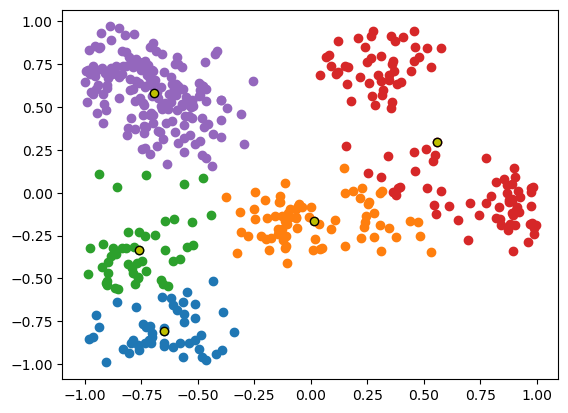

In [436]:
#creating method that calculates Cohesion (SSE) and Separation (SSB)
def cohesion_and_separation(mu, clusters):
    
    # calculate cohesion and separation
    cohesion_sum = 0
    separation_sum = 0

    overall_cent = [np.mean(data[:, 0]), np.mean(data[:, 1])]

    for i in range(len(mu)):
    
        cur_clust = clusters[i]
        transposed = np.array(cur_clust)
        transposed = transposed.transpose()
        
        for j in range(len(transposed)):

            cohesion_sum += get_distance(mu[i], transposed[j]) ** 2
            
        separation_sum += (len(transposed))*(get_distance(mu[i], overall_cent) ** 2)

    return (cohesion_sum, separation_sum)
    

#TODO: fix hard codedness
# plot the data
mu, clusters = k_means_clustering(data, 5)

fig = plt.figure()
ax1 = fig.add_subplot(111)

# cent_1 = clusters[0]
# cent_2 = clusters[1]
# cent_3 = clusters[2]
# cent_4 = clusters[3]
# cent_5 = clusters[4]

# ncent_1 = mu[0]
# ncent_2 = mu[1]
# ncent_3 = mu[2]
# ncent_4 = mu[3]
# ncent_5 = mu[4]

for i in range (len(clusters)):
    cur_clust = clusters[i]
    cur_cent = mu[i]
    ax1.scatter(cur_clust[0], cur_clust[1])
    ax1.scatter(cur_cent[0], cur_cent[1], c='y', edgecolors='black')

# calculate cohesion and separation   
cohesion_sum, separation_sum = cohesion_and_separation(mu, clusters)
    
print("Cohesion Sum: ", cohesion_sum)
print("Separation Sum: ", separation_sum)

Q6. Find the best k for this dataset by plotting SSE vs k for k = 1-10. Based on your plot, which value of k would you choose and why? (answer as a comment)

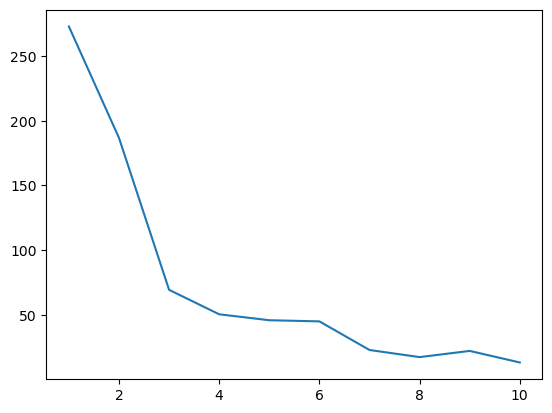

'\n We would choose k = 3 because it has the steepest change in the graph \n'

In [437]:
sse_list = []
k_list = []


#calculates k and SSE for scatter plot
for k in range(1, 11):
    mu, clusters = k_means_clustering(data, k)
    curr_sse, throwaway_var = cohesion_and_separation(mu, clusters)
    
    k_list.append(k)
    sse_list.append(curr_sse)
    
plt.plot(k_list, sse_list)
plt.xlabel='K'
plt.ylabel='SSE'
plt.show()

'''
 We would choose k = 3 because it has the steepest change in the graph 
'''


## Part 2: Implement DBSCAN

For this part you'll be implementing DBSCAN, one of the most popular density based clustering algorithms.

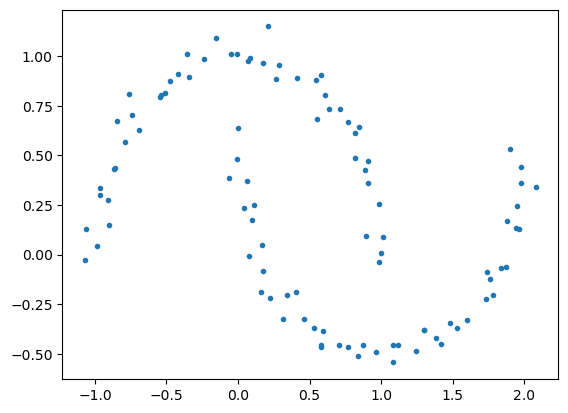

In [438]:
# get data from text file
data = np.genfromtxt("data_dbscan.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')

Q7. First, run your `kMeansClustering` with `k = 2` on this dataset and display the output clusters (make sure that different clusters are marked with different colors). What do you observe? (Answer as a comment.)

" \n The red cluster takes some data points from the original blue cluster. \n It's visually not correct but that's what the clusters split into when using K-Means \n as the clustering method. \n"

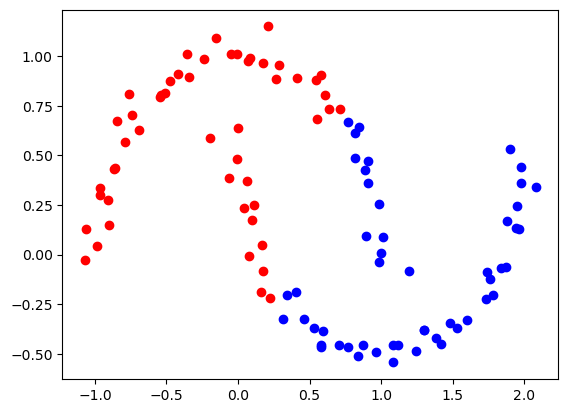

In [439]:
mu, clusters = k_means_clustering(data, 2)
fig = plt.figure()
ax1 = fig.add_subplot(111)

cent_1 = clusters[0]
cent_2 = clusters[1]

ax1.scatter(cent_1[0], cent_1[1], c='b')
ax1.scatter(cent_2[0], cent_2[1], c='r')

''' 
 The red cluster takes some data points from the original blue cluster. 
 It's visually not correct but that's what the clusters split into when using K-Means 
 as the clustering method. 
'''

Q8. Implement the DBSCAN algorithm and display output clusters. There is a  pseudocode version of the DBSCAN algorithm on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) that you are welcome to follow. 

(Also, if you are not familiar with the `continue` statement (in Python, for example), look [here](https://www.tutorialspoint.com/python/python_loop_control.htm) for what it does - it may not do what you think!)

Run your DBSCAN clustering on the data with eps = 0.28 and minPts = 8. Plot the resulting clusters with each cluster, and noise, indicated by different colors. 

In [440]:
def RangeQuery(data, i, eps):
    # List of neighbors
    N = []

    for j in range (len(data)):

            if get_distance(data[i], data[j]) <= eps:
                N.append(j)
        
    return N

def DBSCAN(data, eps, minPts):
    
    #Noise value = -1
    #Undefined = -2
    
    #switching from dictionary to list
    db_cluster = np.arange(len(data))
    db_cluster.fill(-2)
    
    cluster_count = 0                                            
    for i in range (len(data)):
        
        #check if point is already in a defined cluster
        if db_cluster[i] != -2: 
            continue
        
        # find all neighbors of current point
        neigh_set = RangeQuery(data, i, eps)
        
        # if not enough points in cluster, mark as noise
        if len(neigh_set) < minPts:
            db_cluster[i] = -1
            continue
        
        ''' IF ENOUGH NEIGHBORS AND IS NOT YET IN CLUSTER, ADD TO CLUSTER '''
        
        cluster_count = cluster_count + 1
        # Assign point to cluster
        db_cluster[i] = cluster_count
        
        
#       seed set was none type when doing neigh_set.copy().remove(i)
        seed_set = set(neigh_set)
        seed_set.remove(i)
        
        ''' EXPLORE ALL NEIGHBORS OF CURRENT POINT '''
        
        while (seed_set):
            #never updates noise 
            current = seed_set.pop()

            if db_cluster[current] == -1:
                db_cluster[current] = cluster_count

            # If the neighbor has not been visited yet, mark it as visited and
            # add its neighbors to the list of neighbors to explore.
            if db_cluster[current] != -2:
                continue
    
            db_cluster[current] = cluster_count

            ''' FIND NEIGHBORS OF NEIGHBOR '''

            inner_neigh = RangeQuery(data, current, eps)
            
            if len(inner_neigh) >= minPts:
                seed_set.update(inner_neigh)              

    return db_cluster

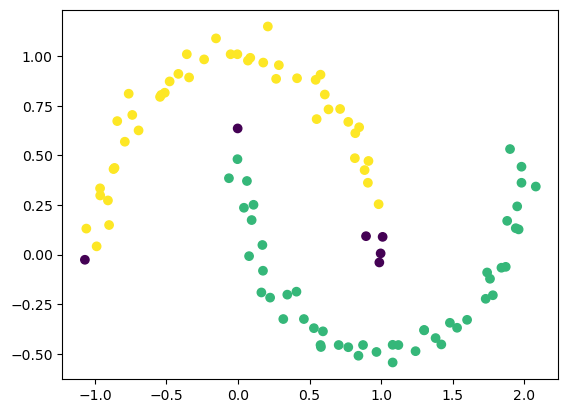

In [441]:
EPS = 0.28
MIN_PTS = 8

cluster_list = DBSCAN(data, EPS, MIN_PTS)

# plot the data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data[:,0], data[:,1], c=cluster_list)

## Part 3: Clustering with scikit-learn and scipy

#### Data

For this part of the assigment you'll be working with the Epileptic Seizure Recognition Data Set developed at Rochester Institute of Technology. In this data set each row is a sample of the EEG recording at a different point in time. The dataset contains 179 columns, the first 178 are the EEG features while the last column represents the label y {1, 2, 3, 4, 5}. All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have an epileptic seizure. The class labels will not be used for clustering (which is an *unsupervised* task!) - they will just be used for plotting the data. The only change that was made to the original dataset was removing the first column, which contained the row indexes. You can find additional information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition).

In [442]:
# Reading the Epileptic Seizure Data Set
dataset = pd.read_csv("data_seizure_edited.csv", header = 0)
print(dataset.shape)

#split the dataset into features and labels
labels = dataset['y']
raw_data = dataset.drop('y', axis = 1)

dataset.head()

(11500, 179)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


#### Data scaling & dimensionality reduction with PCA
Both K-means and DBSCAN break down in high dimensions, as distance (and thus density) become less meaningful in high dimensions. So, before we run either of these clustering algorithms, we want to reduce the dimensionality of our dataset. Recall that it is critical to scale your data prior to running PCA. 

Q9. 
* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features (mean = 0 and variance = 1). Only standardize the the features, not the class labels! This will be required for running the principal component analysis (PCA) dimensionality reduction. Note that `StandardScaler` returns a numpy array.
* Use `sklearn.decomposition.PCA` to perform PCA on the data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many are necessary to retain 95% of the variance. 
* Use `fit_transform` to perform the dimensionality reduction. 
* Note that `fit_transform` returns a numpy array. Put your transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `data = DataFrame(pca_data)`
* Show the head of the resulting DataFrame (and make sure the dimenaionality has actually been reduced).

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components = 0.95, svd_solver = 'full')

scaled_data = scaler.fit_transform(dataset.loc[:, dataset.columns != "y"])

pca_data = pca.fit_transform(scaled_data)
data = DataFrame(pca_data)

print(data.head())

         0         1         2         3         4         5         6   \
0 -0.137475 -1.146419  0.836893 -0.071085 -0.177048 -0.825731  0.777044   
1 -1.703794 -3.643195  6.153822  8.033432  4.549536  5.892971  3.758370   
2  0.495650 -0.261660  0.931210 -0.663789  1.587618 -1.604942 -0.880830   
3 -0.174219  0.249557 -0.073646 -0.108047  1.615415 -3.136337 -0.559638   
4 -0.239163  0.117304  0.486502 -0.530629  0.187739 -0.371186 -0.045861   

         7         8          9   ...        29        30        31        32  \
0  0.337638  2.744494  -0.734679  ...  0.994987 -2.154933  1.053161 -0.090869   
1 -5.804916  4.187441  11.192247  ... -5.864539 -7.613729  5.082526 -2.786232   
2 -1.591959 -0.400873  -1.435073  ...  0.124686  0.027333  0.946955  0.827331   
3 -3.032901 -0.222729  -1.465921  ... -0.322617  0.162047 -0.002372 -0.053858   
4  0.481596 -0.094907   0.541482  ... -0.360548 -0.399276  0.100645 -0.334393   

         33        34        35        36        37        38 

Q10. You are provided code here to plot the data. This code randomly samples 300 rows from the entire dataset, then uses `sklearn.manifold.MDS` to project the data onto 2 dimensions, and plots it on a scatter plot. The points will be marked with appropriate colors based on their labels. This is the only times labels will be used.
* Pass your dataset (that has been reduced in dimensions from Q9) and the labels into this scatter function. Verify that the plot looks like 2 clusters: an inner cluster (non-seizure patients, labels 2-5, will be blue/green/yellow), and an outer cluster (seizure patients, label 1, will be purple).

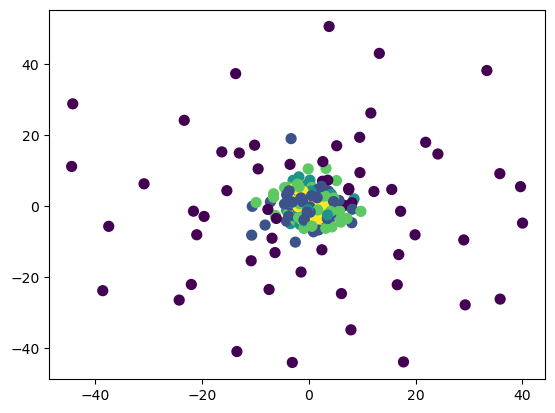

In [444]:
# do not change this plotting function!
def scatter(data, labels, numPoints = 300):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

scatter(data, dataset.loc[:,"y"])

#### Clustering with DBSCAN

Recall that for DBSCAN, we need to select an Eps and a MinPts. If we choose MinPts to be 4, then Eps can be selected by plotting the distance of every point to its 4th nearest neighbor and finding the "bend" in the graph. 

Q11. Find the optimal Eps for this dataset by plotting the distances of every point to its 4th nearest neighbor.
* Use `sklearn.neighbors.NearestNeighbors` with `n_neighbors=4`. Call `fit` on your data.
* Use the `kneighbors` method to find the distance of each point to its 4th nearest neighbor. Note that `kneighbors` returns two values. The first return value is a matrix of distances from each point to its k nearest neighbors. For example: 

Sklearn considers the distance from the point to itself as the closest neighbor (a distance of 0), then if the point is a distance of 2.5 away from its second nearest neighbor, a distance of 3.7 away from its third nearest neighbor, and a distance of 4.2 away from its fourth nearest neighbor, the row in the distance matrix for this point would look like: `[0, 2.5, 3.7, 4.2]`, indicating that 4.2 is the distance from this point to it's 4th nearest neighbor. 

* Plot the distance of every point to its 4th nearest neighbor. Be sure to sort the distances before you plot them. You can use `plt.plot(distances)` then `plt.show()` to plot them. 
* Use the plot to determine the best Eps for this dataset (just eyeball it).

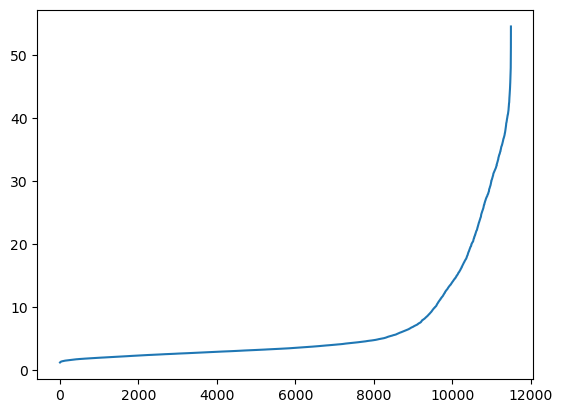

' \nThe best eps is around 10 \n'

In [445]:
from sklearn.neighbors import NearestNeighbors

minPts = 4

near_neigh = NearestNeighbors(n_neighbors=minPts)
near_neigh.fit(data)

neigh_dist, trash = near_neigh.kneighbors()

#gets column with distances from 4th closest neighbor
neigh_dist = neigh_dist[:, minPts-1]
neigh_dist.sort()

plt.plot(neigh_dist)
plt.show()

''' 
The best eps is around 10 
'''

Q12. 
* Using MinPts=4 and Eps=the distance you determined from Q11, cluster the data using `sklearn.cluster.DBSCAN`. Call `fit_predict` on your data and store the return value (the predicted cluster label for each data point). Note that the returned type is a numpy array. 
* Use the provided `scatter` function (Q10) to plot the resulting clusters. You will need to convert the numpy array of predicted labels to a `Series` in order to pass it in to `scatter`.

[ 0 -1  0 ...  0  0  0]


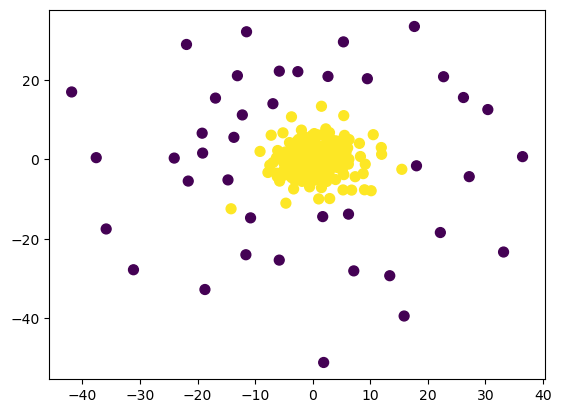

In [446]:
from sklearn.cluster import DBSCAN

db_scan = DBSCAN(min_samples=4, eps=10)
pred_clust_label = db_scan.fit_predict(data)

print(pred_clust_label)

scatter(data, pd.Series(pred_clust_label))

#### Clustering with K-means

Q13. 
* Use `sklearn.cluster.KMeans` to cluster this data using K means. Try values of k from 2 to 5. You will need to call `fit_predict` on your data and store the return value (the predicted cluster label for each data point). Note that the returned type is a numpy array. 
* Use `sklearn.metrics.silhouette_score` to evaluate which is the best number of clusters for this dataset. 
* Use the provided `scatter` function (Q10) to plot the clustering that resulted in the best shilhouette score. Note that you will need to cast the predicted cluster labels (a numpy array) to a Series in order to pass it in to `scatter`.

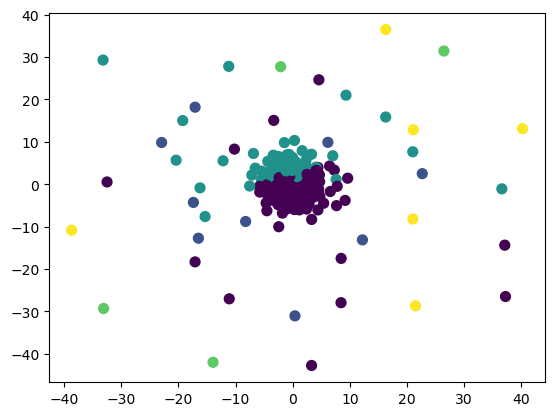

In [447]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_labels = {}

for i in range(2, 6, 1):
    cur_kmean = KMeans(n_clusters=i)
    pred_clust_labels = cur_kmean.fit_predict(data)
        
    cur_score = silhouette_score(data, pred_clust_labels)
        
    if cur_score > best_score:
        best_score = cur_score
        best_labels = pred_clust_labels
        

#call scatter on plot with best silhouette score
scatter(data, pd.Series(best_labels))

Q14. What do you observe about the results of DBSCAN vs the results of K-means? Answer as a comment.

In [448]:
''' 
DBSCAn's results only divides the datapoints into 2-3 colors/clusters.
K-Mean's results divides the datapoints into 3+ colors/clusters. 
'''

" \nDBSCAn's results only divides the datapoints into 2-3 colors/clusters.\nK-Mean's results divides the datapoints into 3+ colors/clusters. \n"

#### Hierarchical Clustering

For hierarchical clustering (Q15 and Q16), you'll work with just a sample of 115 datapoints. The function to downsample your data is provided here for you.

In [449]:
# Do not change the code in this cell
# stratified sampling of the data
def downsample_data(data, labels):
    downData = None
    downLabels = None

    kfold = StratifiedKFold(n_splits = 100, shuffle = False)
    for throwAway_index, subsample_index in kfold.split(data, labels):
        downData = data.iloc[subsample_index]
        downLabels = labels.iloc[subsample_index]
        break
    
    print(downData.shape)
    return downData

Q15. Use Scipy's hierarchical clustering (`scipy.cluster.hierarchy`) to cluster the data using different linkage methods. **Make sure you are using a down-sampled dataset by passing your dataset into the provided downsample_data() function.**

* Try all of these linkage methods: `single`, `complete`, `average`, `centroid`, `ward`
* Note that the return value of the clustering is a linkage matrix (a cophenetic distance matrix)

* Calculate the CPCC of each linkage method to determine which method worked best. Use `scipy.cluster.hierarchy.cophenet` for this. You'll pass in the linkage matrix from the clustering, and a proximity matrix that contains the actual distances between each point, which you can get by using `scipy.spatial.distance.pdist`. 

In [450]:
from scipy.cluster import hierarchy

# Make sure to pass your dataset into downsample_data() 
# and use the resulting smaller dataset for hierachical clustering

downData = downsample_data(data, dataset.loc[:,"y"])

# Pass the down-sampled dataset into pdist to get your proximity matrix for calculating CPCC
proximity_matrix = pdist(downData)

linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

high_score = -1
best_method = 'single'
best_matrix = None
# the rest of your code goes here
for i in range(len(linkage_methods)):

    cur_matrix = hierarchy.linkage(downData, linkage_methods[i])
    corr_score, trash = hierarchy.cophenet(cur_matrix, proximity_matrix) 
    
    if corr_score > high_score:
        high_score = corr_score
        best_method = linkage_methods[i]
        best_matrix = cur_matrix

print("Best score: ", high_score)
print("Best method: ", best_method)


(115, 39)
Best score:  0.9910633636860083
Best method:  centroid


Q16. Using the best linkage method that you found in Q7, plot the dendrogram with `scipy.cluster.hierarchy.dendrogram`. (The labels on the x-axis will be too small to read - that is ok!)

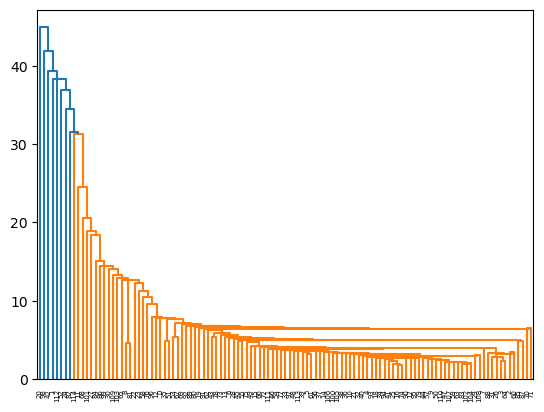

In [451]:
# your code goes here

fig = plt.figure()
dn = hierarchy.dendrogram(best_matrix)
plt.show()


#### Anomaly Detection (AD)

Anomaly detection (AD) algorithms can be broadly classified into 3 classes:
- Supervised AD (labels available for both normal data and anomalies)
- Semi-supervised AD, also called Novelty Detection (only normal data is available to train on)
- Unsupervised AD, also called Outlier Detection (no labels are provided)

In this part you'll experiment with 4 datasets and compare 4 different outlier detection (Unsupervised AD) methods.

In [452]:
# loading the datasets
filenames = ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv']
datasets = [np.loadtxt(fname, delimiter=',') for fname in filenames]
for fname, data in zip(filenames, datasets):
    print (fname, data.shape)

data1.csv (445, 2)
data2.csv (314, 2)
data3.csv (419, 2)
data4.csv (441, 2)


Q17. Detect the outliers in all 4 datasets using the following algorithms:
- `sklearn.covariance.EllipticEnvelope` - a statistical-based AD method
- `sklearn.ensemble.IsolationForest` - an isolation-based AD method
- `sklearn.neighbors.LocalOutlierFactor` - a density-based AD method
- `sklearn.svm.OneClassSVM` - a model-based AD method

Create scatterplots that show the outliers detected in each dataset with each method. (16 plots in total.)

The following plotting function is provided for you. You should pass in a list of y_pred values corresponding to all 16 of your plots. 

In order for this plotting function to work correctly, the order of your list should be: ElipticEnvelope on dataset1, IsolationForest on dataset1, LocalOutlierFactor on dataset1, OneClassSVM on dataset1, ElipticEnvelope on ds2, IsolationForest on ds2, LocalOutlierFactor on ds2, OneClassSVM on ds2, EE on ds3, IF on ds3, LOF on ds3, SVM on ds3, EE on ds4, IF on ds4, LOF on ds4, SVM on ds4.

In [453]:
# Do not change the code in this cell!
# Create all 16 anomaly detection plots
def plot_all(y_preds):
    
    print("len(y_preds):", len(y_preds))
    
    names = ['Robust Covariance', 'Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
    plt.figure(figsize=(len(names) * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
    plot_num = 1
    
    for i_dataset in range(len(datasets)):
        for j_algorithm in range(len(names)):
            
            plt.subplot(len(datasets), len(names), plot_num)
            if i_dataset == 0:
                plt.title(names[j_algorithm], size=18)

            colors = np.array(['#377eb8', '#ff7f00'])
            plt.scatter(datasets[i_dataset][:, 0], datasets[i_dataset][:, 1], 
                        s=10, color=colors[(y_preds[plot_num-1] + 1) // 2])

            plt.xlim(-7, 7)
            plt.ylim(-7, 7)
            plt.xticks(())
            plt.yticks(())
            
            plot_num += 1

    plt.show()

Directions:
* Use a `contamination` (or `nu` for `OneClassSVM`) of 0.25.
* For the `OneClassSVM` use `rbf` kernel.
* NOTE: To preform AD in an unsupervised way, you will pass the same dataset into `fit` and `predict.`

Some code is provided here to get you started.

len(y_preds): 16


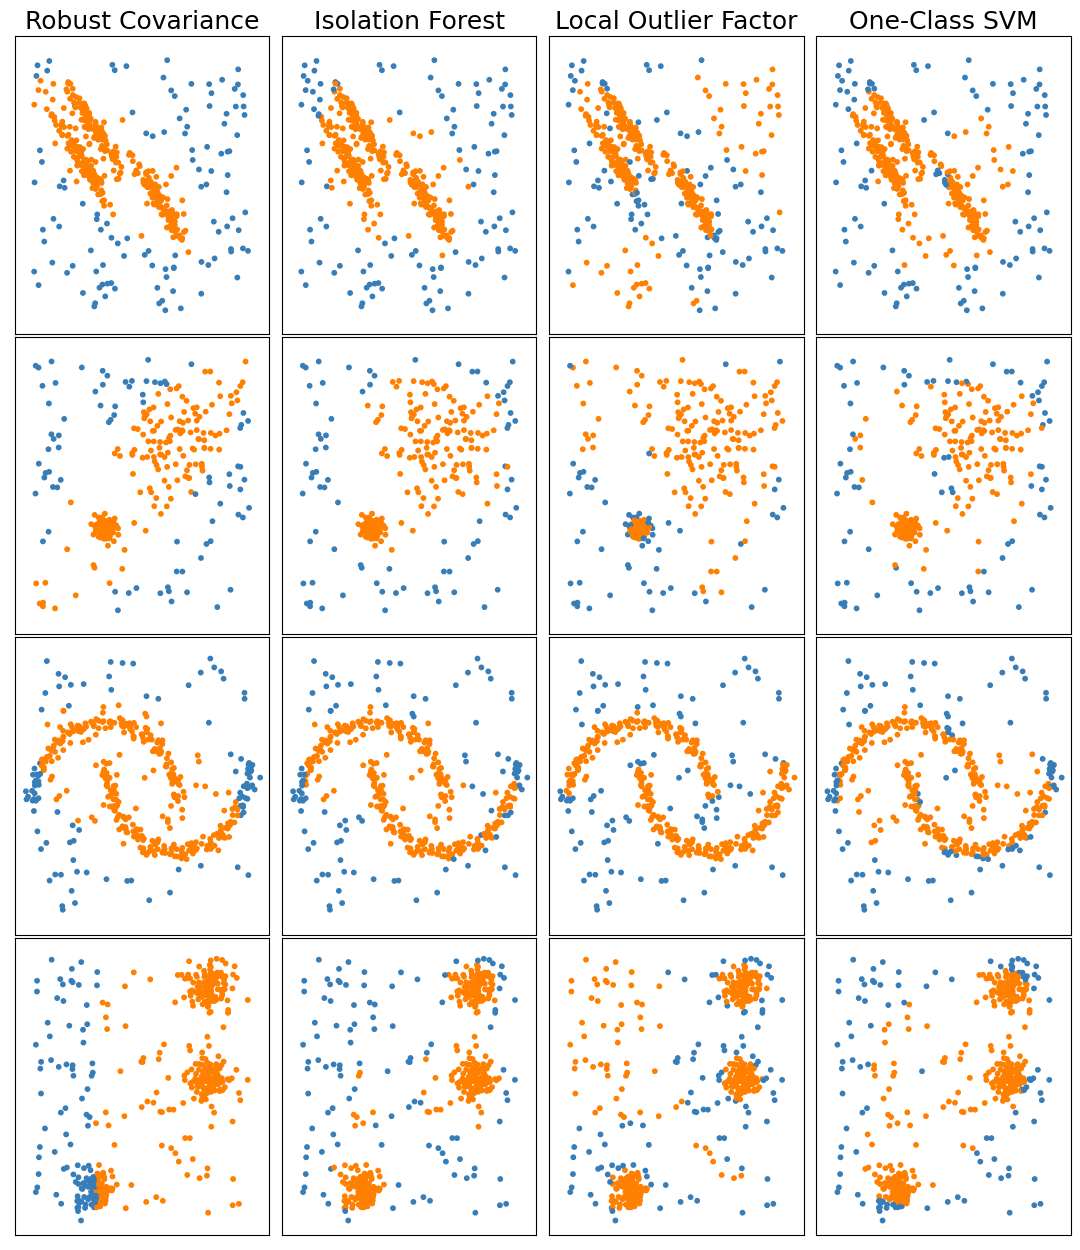

In [454]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


outliers_fraction = 0.25

#this will be your list of 16 plots
y_pred_list = list()

#for each of the 4 datasets
for X in datasets:
    
    #apply EllipticEnvelope AD
    EE = EllipticEnvelope(contamination = 0.25).fit(X)
    EEpred = EE.predict(X)
    #append resulting y_pred to y_pred_list
    y_pred_list.append(EEpred)
    
    #apply IsolationForest AD
    IF = IsolationForest(contamination = 0.25).fit(X)
    IFpred = IF.predict(X)
    #append resulting y_pred to y_pred_list
    y_pred_list.append(IFpred)
    
    #apply LocalOutlierFactor AD
    LOF = LocalOutlierFactor(contamination = 0.25, novelty=True).fit(X)
#     LOFpred = LOF.fit_predict(X)
    LOFpred = LOF.predict(X)
    #append resulting y_pred to y_pred_list
    y_pred_list.append(LOFpred)

    #apply OneClassSVM AD
    SVM = OneClassSVM(nu = 0.25, kernel = 'rbf').fit(X)
    SVMpred = SVM.predict(X)
    #append resulting y_pred to y_pred_list
    y_pred_list.append(SVMpred)
 

plot_all(y_pred_list)